### Analytical Calculation of Output Distribution (1Dimension case)
#### By Irene Virdis
Given the normal random distribution $f_X (x)$, we want to calculate the output distribution $f_Y (y)$ through the selected function $Y=g(X)$ of the random variable X.

\begin{equation}\label{eq:input}
f_X (x)  = \frac{1}{\sqrt{2\cdot \pi} \cdot \sigma} e^{\frac{-(x-\mu)^2}{\sigma^2}} ; \\
Y = g(X) = 3\cdot x +2.5
\end{equation}

The probability density function for the linear case has a well known form:

$f_Y (y) = \frac{1}{|a|}f_X (\frac{y-b}{a})$ if $(y-b)\geq 0 $, where $a$ and $b$ are defined by $Y = aX+b$

The normality is preserved by the linear transformations, so the values of mean and variance of the output distributions are known:

$E[Y]= a\mu$ +b

$var(Y)=a^2 \sigma^2$

The Probability Density Functions for input and output distributions have been plotted: in the following lines the Python code used to realize them has been reported:

In [1]:
import numpy as np
import scipy.integrate as integrate
from math import exp
from equadratures import *

The 'blackbox' function as been defined with the linear function of variable X:

In [2]:
a = 3.0
b = 2.5

def blackbox(x):
    return a*x[0]+b

In [3]:

#------------------------ parameters for input distribution -------------#
sigma_quad = 3
std_dev = np.sqrt(sigma_quad)
mu = 2.0

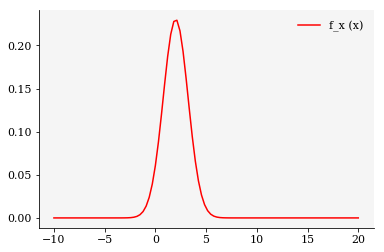

In [4]:
x = np.linspace(-10.0,20.0,100)

def fx(x):
    first = 1/(std_dev*np.sqrt(2*3.14))
    second = np.exp((-(x-mu)**2)/sigma_quad)
    return first*second

y = blackbox(x)
y_i = fx(x)

plt.figure()
plt.grid()
plt.plot(x,y_i,'r-', label='f_x (x)')
plt.legend(loc='upper right')
#------ for output-----#
#axes=plt.gca()
#axes.set_xlim([-20,50])
plt.show()

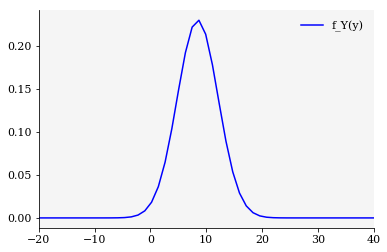

In [24]:
x = np.linspace(-10,30.0,100)
sigma_quad = 3
std_dev = np.sqrt(sigma_quad)
mu = 2.0

sigma_quad = sigma_quad*a**2
mu = mu*a +b

def fxo(x):
    primo = 1/(std_dev*np.sqrt(2*3.14))
    secondo = np.exp((-(x-mu)**2)/sigma_quad)
    return primo*secondo

y_o = fxo(y)


plt.figure()
plt.grid()
plt.plot(y,y_o,'b-',label='f_Y(y)')
plt.legend(loc='lower high')
#------ for output-----#
axes=plt.gca()
axes.set_xlim([-20,40])
plt.show()

#### Mean and Variance of output distribution

The mean and the variance of the output distribution can be calculed with the analytical form and by means of Monte Carlo method: the pyhon script used to this aim has been reported as follows:

In [6]:
# MonteCarlo
mu = 2 # mean
sigma_quad = 3 # variance
std_dev = np.sqrt(sigma_quad) # standard deviation

N = 1099000

xi = np.random.normal(mu,std_dev,(N,1))
yi = evalfunction(np.reshape(xi, (N,1)), blackbox)
print 'Monte Carlo:'
print np.mean(yi), np.var(yi)

Monte Carlo:
8.49987943524359 27.00228040290774


For the analytical solution, given $a=3$, $b=2.5$:

$E[Y] = a \cdot \mu +b = 8.5$ 

$var(X) = a^2\cdot \sigma^2 = 27$

### Numerical Solution with Effective Quadrature

The mean and the variance of output distribution have been numerically calculated with Effective Quadrature code: to this aim the paramenters of the exponential input distribution have been specified as argument of class $\textit{Parameter}$:

- order: number of points used for quadrature inside the interval $[upper, lower]$
- shape parameter A: it represents the mean of the normal distribution $\mu$
- shape parameter B: it represents the variance of normal distribution $\sigma^2$

In the following lines the Python code for calculation has been reported:

In [7]:
#------------------------ parameters for input distribution -------------#
sigma_quad = 3 # variance
std_dev = np.sqrt(sigma_quad) # standard deviation
mu = 2.0 # mean

# Using polynomials!

xo = Parameter(order=5, distribution='Gaussian', shape_parameter_A=mu, shape_parameter_B=sigma_quad)
myBasis = Basis('Tensor')
myPoly = Polyint([xo], myBasis)
myPoly.computeCoefficients(blackbox)
myStats = myPoly.getStatistics()
print 'Effective Quadratures'
print 'mean:',myStats.mean,'variance:', myStats.variance

Effective Quadratures
mean: 8.5 variance: 27.0
